Model je oblika y_hat = Theta0 + Theta1 * x
y_hat =  [0.14219055] + [[0.3225882]] *x


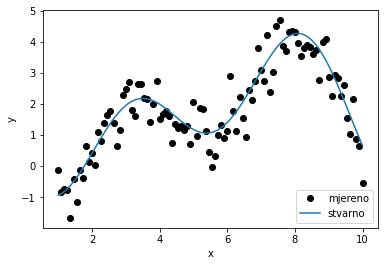

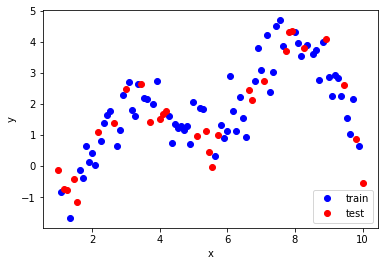

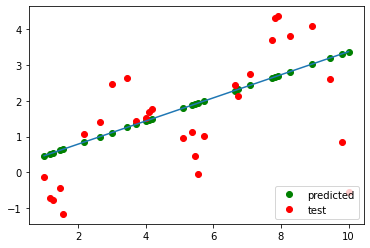

In [21]:
#1 ZAD

import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
def non_func(x):
 y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
 return y
def add_noise(y):
 np.random.seed(14)
 varNoise = np.max(y) - np.min(y)
 y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
 return y_noisy
x = np.linspace(1,10,100)
y_true = non_func(x)
y_measured = add_noise(y_true)
plt.figure(1)
plt.plot(x,y_measured,'ok',label='mjereno')
plt.plot(x,y_true,label='stvarno')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)
np.random.seed(12)
indeksi = np.random.permutation(len(x))
indeksi_train = indeksi[0:int(np.floor(0.7*len(x)))]
indeksi_test = indeksi[int(np.floor(0.7*len(x)))+1:len(x)]
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]
xtrain = x[indeksi_train]
ytrain = y_measured[indeksi_train]
xtest = x[indeksi_test]
ytest = y_measured[indeksi_test]
plt.figure(2)
plt.plot(xtrain,ytrain,'ob',label='train')
plt.plot(xtest,ytest,'or',label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)
linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)
print('Model je oblika y_hat = Theta0 + Theta1 * x')
print('y_hat = ', linearModel.intercept_, '+', linearModel.coef_, '*x')
ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)
plt.figure(3)
plt.plot(xtest,ytest_p,'og',label='predicted')
plt.plot(xtest,ytest,'or',label='test')
plt.legend(loc = 4)
x_pravac = np.array([1,10])
x_pravac = x_pravac[:, np.newaxis]
y_pravac = linearModel.predict(x_pravac)
plt.plot(x_pravac, y_pravac) 

In [35]:
#2 ZAD

import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

xTrain = xtrain
xTrain = np.insert(xTrain,0,1,axis=1)

def getThetaML(x,y):
    return (np.linalg.inv(np.matrix.transpose(x)@x))@np.matrix.transpose(x)@y

thetaML = getThetaML(xTrain,ytrain)

print('theta0 =',thetaML[0])
print('theta1 =',thetaML[1])
print('yHatML =',thetaML[0][0],'+',thetaML[1][0],'x')

theta0 = [0.14219055]
theta1 = [0.3225882]
yHatML = 0.14219054706711476 + 0.3225881958054343 x


Model je oblika y_hat = Theta0 + Theta1 * x
y_hat =  [0.14219055] + [[0.3225882]] *x


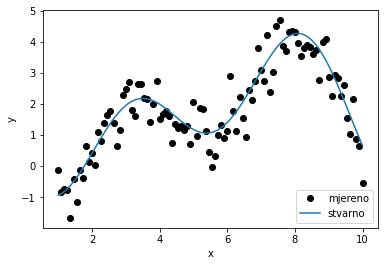

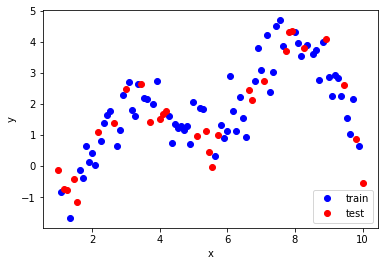

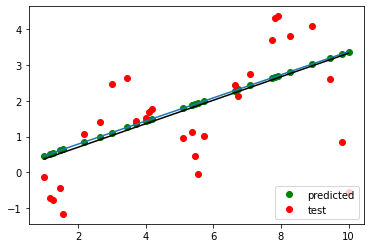

In [50]:
#3 ZAD

import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error

def non_func(x):
	y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
	return y

def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy

def pravac(x, theta):
    return theta[1]*x + theta[0]

def kriterijska(theta,x,y):
    J = 0.0
    n = x.shape[0]
    for i in range(0,n):
        J+=(pravac(x[i],theta)-y[i])**2
    J /= (2*n)
    return J

def diferencijal(theta,x,y):
    b = 0.0
    k = 0.0
    for i in range(0,x.shape[0]):
          b += pravac(x[i],theta) - y[i]
          k += (pravac(x[i],theta) - y[i])*x[i]
    b /= x.shape[0]
    k /= x.shape[0]
    return b,k

x = np.linspace(1,10,100)
y_true = non_func(x)
y_measured = add_noise(y_true)

plt.figure(1)
plt.plot(x,y_measured,'ok',label='mjereno')
plt.plot(x,y_true,label='stvarno')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)

np.random.seed(12)
indeksi = np.random.permutation(len(x))
indeksi_train = indeksi[0:int(np.floor(0.7*len(x)))]
indeksi_test = indeksi[int(np.floor(0.7*len(x)))+1:len(x)]
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]
xtrain = x[indeksi_train]
ytrain = y_measured[indeksi_train]
xtest = x[indeksi_test]
ytest = y_measured[indeksi_test]

plt.figure(2)
plt.plot(xtrain,ytrain,'ob',label='train')
plt.plot(xtest,ytest,'or',label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)

linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)

print('Model je oblika y_hat = Theta0 + Theta1 * x')
print('y_hat = ', linearModel.intercept_, '+', linearModel.coef_, '*x')

ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)

plt.figure(3)
plt.plot(xtest,ytest_p,'og',label='predicted')
plt.plot(xtest,ytest,'or',label='test')
plt.legend(loc = 4)

x_pravac = np.array([1,10])
x_pravac = x_pravac[:, np.newaxis]
y_pravac = linearModel.predict(x_pravac)
plt.plot(x_pravac, y_pravac)
xp = np.array([x.min(), x.max()])
yp=np.zeros((2,1))
no_iter = 150
theta = np.array([0,0])
learning_rate = 0.005
theta = np.zeros((2,1))
J = np.zeros((no_iter,1))
for i in range(0,no_iter):
    J[i]=kriterijska(theta,x,y_measured)
    b,k=diferencijal(theta,x,y_measured)
    theta[0] = theta[0] - learning_rate * b
    theta[1] = theta[1] - learning_rate * k   
yp[0] = pravac(xp[0],theta)
yp[1] = pravac(xp[1],theta)
plt.plot(xp,yp,'k')

#Povecavanjem koeficijenta alfa smanjuju se vrijednosti theta0 i theta1

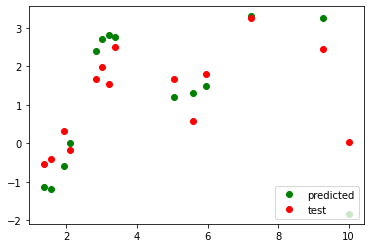

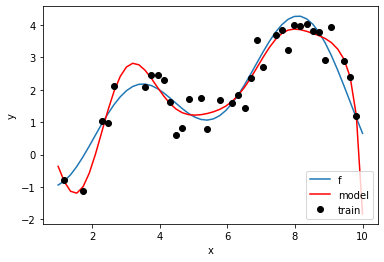

In [2]:
#4 ZAD

import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
def non_func(x):
 y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
 return y
def add_noise(y):
 np.random.seed(14)
 varNoise = np.max(y) - np.min(y)
 y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
 return y_noisy

x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]
# make polynomial features
poly = PolynomialFeatures(degree=15)
xnew = poly.fit_transform(x)

np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]
xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]
xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]
linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)
ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)
plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)
#pozadinska funkcija vs model
plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel.predict(xnew),'r-',label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4)

#Krivulja iz ovog zadatka se bolje poklapa s podacima nego pravac iz prvog zadatka

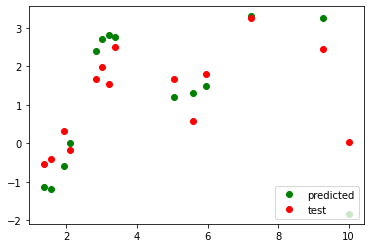

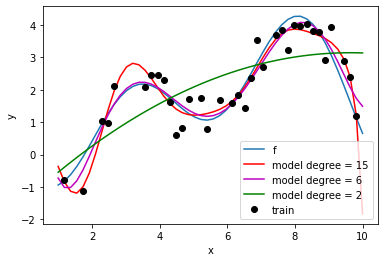

In [43]:
#5 ZAD

import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

def non_func(x):
 y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
 return y

def add_noise(y):
 np.random.seed(14)
 varNoise = np.max(y) - np.min(y)
 y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
 return y_noisy

x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]
# make polynomial features
poly = PolynomialFeatures(degree=15)
poly2 = PolynomialFeatures(degree=6)
poly3 = PolynomialFeatures(degree=2)
xnew = poly.fit_transform(x)
xnew2 = poly2.fit_transform(x)
xnew3 = poly3.fit_transform(x)

np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]
xtrain = xnew[indeksi_train,]
xtrain2 = xnew2[indeksi_train,]
xtrain3 = xnew3[indeksi_train,]
ytrain = y_measured[indeksi_train]
xtest = xnew[indeksi_test,]
xtest2= xnew2[indeksi_test,]
xtest3 = xnew3[indeksi_test,]
ytest = y_measured[indeksi_test]
linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)
linearModel2 = lm.LinearRegression()
linearModel2.fit(xtrain2,ytrain)
linearModel3 = lm.LinearRegression()
linearModel3.fit(xtrain3,ytrain)
ytest_p = linearModel.predict(xtest)
ytest_p2 = linearModel2.predict(xtest2)
ytest_p3 = linearModel3.predict(xtest3)
MSE_test = [mean_squared_error(ytest, ytest_p),mean_squared_error(ytest,ytest_p2), mean_squared_error(ytest,ytest_p3)]
plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)
#pozadinska funkcija vs model
plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel.predict(xnew),'r-',label='model degree = 15')
plt.plot(x,linearModel2.predict(xnew2),'m-',label='model degree = 6')
plt.plot(x,linearModel3.predict(xnew3),'g-',label='model degree = 2')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4) 

#Rezultati su precizniji što je broj uzoraka veći

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.30104e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


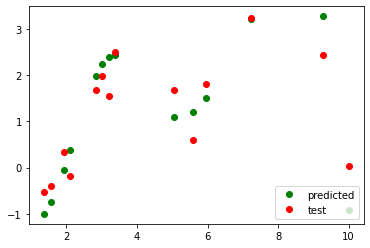

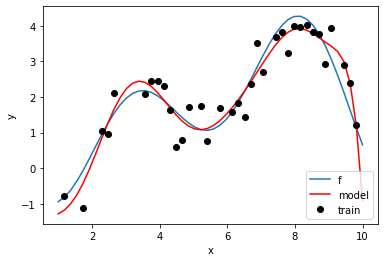

In [42]:
#6 ZAD

import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

def non_func(x):
 y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
 return y
def add_noise(y):
 np.random.seed(14)
 varNoise = np.max(y) - np.min(y)
 y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
 return y_noisy

x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]
# make polynomial features
poly = PolynomialFeatures(degree=15)
xnew = poly.fit_transform(x)

np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]
xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]
xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]
linearModel = lm.Ridge()
linearModel.fit(xtrain,ytrain)
ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)
plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)
#pozadinska funkcija vs model
plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel.predict(xnew),'r-',label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4)

In [ ]:
#7 ZAD

from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

boston = load_boston()
X = boston.data
y = boston.target

print(boston.feature_names)

variables = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
variableNames = ['Per capita crime rate by town','Proportion of residential land zoned for lots over 25,000 sq.ft.',
               'Proportion of non-retail business acres per town','Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
               'Nitric oxides concentration (parts per 10 million)','Average number of rooms per dwelling',
               'Proportion of owner-occupied units built prior to 1940','Weighted distances to five Boston employment centres',
               'Index of accessibility to radial highways','Full-value property-tax rate per $10,000',
               'Pupil-teacher ratio by town','Proportion of black people by town',
               '% lower status of the population']

def sampleData(x,y):
    sample = np.random.choice(x.shape[0], 2, replace=False)
    theta_1 = (y[sample[1]] - y[sample[0]]) / (x[sample[1]] - x[sample[0]])
    theta_0 = theta_1*(-x[sample[0]]) + y[sample[0]]
    theta = np.array([theta_0, theta_1])
    return theta

def distanceToLine(x,y,theta):
    distance = abs(theta[0] + theta[1]*x - y)/(math.sqrt(1+theta[1]**2))
    #distance = abs(theta[0] + theta[1]*x - y)
    return distance  
    
def linearRegression(bostonDataX,bostonDataY):
    x=np.array(bostonDataX)
    y=np.array(bostonDataY)
    x=np.reshape(x,(x.shape[0],1)) 
    X = np.ones((len(x),1))
    X = np.append(X, x, axis=1)
    theta_direct = np.linalg.inv(np.transpose(X) @ X) @ np.transpose(X) @ y    
    xp = np.array([x.min(), x.max()])
    yp = np.array([pravac(xp[0],theta_direct), pravac(xp[1],theta_direct)])    
    plt.title("Linear Regression")
    plt.xlabel('Median value of owner-occupied homes in $1000\'s')
    plt.ylabel(variableNames[variables.index(bostonDataY.name)])
    plt.plot(xp,yp,'r',label=bostonDataY.name)
    plt.scatter(x, y, c='c')
    plt.legend(loc=2)
    plt.show()

def pravac(x, theta):
    return theta[1]*x + theta[0]
    
def getMEDVdistribution(bostonData):
    plt.figure()
    plt.hist(bostonData['MEDV'])
    plt.xlabel('Median value of owner-occupied homes in $1000\'s')
    bostonData['MEDV'].plot.hist()
    plt.title('Distribution of house prices')
    plt.show()
    
def plotRiverRelevance(bostonData):
    plt.figure()
    fig=bostonData.boxplot(column='MEDV',by='CHAS').get_figure()
    fig.suptitle('Charles River relevance')
    fig.show()    
    
def getLinearRegressions():
    linearRegression(bostonData['MEDV'], bostonData['CRIM'])
    linearRegression(bostonData['MEDV'], bostonData['ZN'])
    linearRegression(bostonData['MEDV'], bostonData['INDUS'])
    linearRegression(bostonData['MEDV'], bostonData['NOX'])
    linearRegression(bostonData['MEDV'], bostonData['RM'])
    linearRegression(bostonData['MEDV'], bostonData['AGE'])
    linearRegression(bostonData['MEDV'], bostonData['DIS'])
    linearRegression(bostonData['MEDV'], bostonData['RAD'])
    linearRegression(bostonData['MEDV'], bostonData['TAX'])
    linearRegression(bostonData['MEDV'], bostonData['PTRATIO'])
    linearRegression(bostonData['MEDV'], bostonData['B'])
    linearRegression(bostonData['MEDV'], bostonData['LSTAT'])
    
def visualizeData(bostonData):
    getLinearRegressions()
    plotRiverRelevance(bostonData)
    getMEDVdistribution(bostonData)
    
def getTrainTestIndices(x,trainPercent):
    np.random.seed(12)
    indeksi = np.random.permutation(len(x))
    indeksi_train = indeksi[0:int(np.floor(trainPercent*len(x)))]
    indeksi_test = indeksi[int(np.floor(trainPercent*len(x)))+1:len(x)]
    return indeksi_train,indeksi_test

bostonData=pd.DataFrame(data=X,columns=boston.feature_names)
bostonData['MEDV']=y
bostonData=bostonData.sort_values('MEDV')
regularizationValues = range(0, 50000, 500)
optimalDegree=0
optimalRegularization=0
optimal_mse_error=500000
optimalTrainPercent=0
MSE_train_opt = []
MSE_test_opt = []
visualizeData(bostonData)

for iter in range(1,5):
    for j in range(10,20):
        MSE_train = []
        MSE_test = []
        poly = PolynomialFeatures(degree=iter)
        x = poly.fit_transform(X)
        indeksi_train,indeksi_test=getTrainTestIndices(x,j*0.05)       
        xtrain = x[indeksi_train]
        ytrain = y[indeksi_train]        
        xtest = x[indeksi_test]
        ytest = y[indeksi_test]
        for value in regularizationValues:
            ridgeModel = lm.Ridge(value)
            ridgeModel.fit(xtrain,ytrain)           
            ytrain_p = ridgeModel.predict(xtrain)
            mean_train_error=mean_squared_error(ytrain, ytrain_p)
            MSE_train.append(mean_train_error)        
            ytest_p = ridgeModel.predict(xtest)
            mean_test_error=mean_squared_error(ytest, ytest_p)
            MSE_test.append(mean_test_error)          
            if(mean_test_error<optimal_mse_error):
                optimal_mse_error=mean_test_error
                optimalRegularization=value
                optimalDegree=iter
                optimalTrainPercent=j*0.05
                MSE_train_opt=MSE_train
                MSE_test_opt=MSE_test
                
plt.figure()
plt.plot(regularizationValues, MSE_train_opt, label = 'MSE_Train')
plt.plot(regularizationValues, MSE_test_opt, label = 'MSE_Test')
plt.title('MSE for the given polynomial degree ' + str(optimalDegree))
plt.xlabel('Regularization Strength')
plt.ylabel('Mean squared error')
plt.legend()

poly_optimal = PolynomialFeatures(degree=optimalDegree)
xnew = poly_optimal.fit_transform(X)
indeksi_train,indeksi_test=getTrainTestIndices(xnew,optimalTrainPercent)
xtrain = xnew[indeksi_train]
ytrain = y[indeksi_train]
xtest = xnew[indeksi_test]
ytest = y[indeksi_test] 
ridgeModel = lm.Ridge(optimalRegularization)
ridgeModel.fit(xtrain,ytrain)
ytrain_p = ridgeModel.predict(xtrain)
ytest_p = ridgeModel.predict(xtest)

plt.figure()
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)
plt.show()